In [1]:
# Basketball Problem - Passing
import numpy as np

# Adjacency Matrix
T = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 0, 1, 0],
    [1, 0, 0, 1, 0],
    [0, 1, 0, 0, 1],
    [0, 0, 1, 0, 0]
])

# The ball starts in A's hands. How many ways are there for the ball to end up in D's hands after 5 passes? After 6 passes?

# Find T^5
T_5 = np.linalg.matrix_power(T, 5)
print(T_5)

# After 5 passes (using T^5)
ways_after_5_passes = T_5[0, 3]  # A is index 0, D is index 3
print(f"Number of ways for the ball to end up in D's hands after 5 passes: {ways_after_5_passes}")

# Calculate T^6
T_6 = np.linalg.matrix_power(T, 6)
print(T_6)

# After 6 passes (using T^6)
ways_after_6_passes = T_6[0, 3]  # A is index 0, D is index 3
print(f"Number of ways for the ball to end up in D's hands after 6 passes: {ways_after_6_passes}")

[[ 2 12  6  2  6]
 [ 9  2  4  9  1]
 [ 9  2  4  9  1]
 [ 4  6  4  4  3]
 [ 1  6  3  1  3]]
Number of ways for the ball to end up in D's hands after 5 passes: 2
[[18  4  8 18  2]
 [ 6 18 10  6  9]
 [ 6 18 10  6  9]
 [10  8  7 10  4]
 [ 9  2  4  9  1]]
Number of ways for the ball to end up in D's hands after 6 passes: 18


In [2]:
# List all of the specific paths that the ball can take to end up in D's hands after 5 passes:

def find_paths(T, start, end, length):
    if length == 0:
        return [[start]] if start == end else []
    
    paths = []
    for neighbor in range(len(T)):
        if T[start][neighbor] == 1:
            sub_paths = find_paths(T, neighbor, end, length - 1)
            for path in sub_paths:
                paths.append([start] + path)
    return paths

# Find all paths from A (index 0) to D (index 3) with 5 passes
all_paths = find_paths(T, 0, 3, 5)

# Convert numeric indices to letters
index_to_letter = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
letter_paths = [' -> '.join(index_to_letter[i] for i in path) for path in all_paths]

print(f"Number of paths: {len(letter_paths)}")
print("All paths:")
for path in letter_paths:
    print(path)

Number of paths: 2
All paths:
A -> B -> D -> E -> C -> D
A -> C -> D -> E -> C -> D


In [3]:
# List all of the specific paths that the ball can take to end up in D's hands after 6 passes:

# Find all paths from A (index 0) to D (index 3) with 6 passes
all_paths = find_paths(T, 0, 3, 6)

# Convert numeric indices to letters
index_to_letter = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
letter_paths = [' -> '.join(index_to_letter[i] for i in path) for path in all_paths]

print(f"Number of paths: {len(letter_paths)}")
print("All paths:")
for path in letter_paths:
    print(path)

Number of paths: 18
All paths:
A -> B -> A -> B -> A -> B -> D
A -> B -> A -> B -> A -> C -> D
A -> B -> A -> B -> D -> B -> D
A -> B -> A -> C -> A -> B -> D
A -> B -> A -> C -> A -> C -> D
A -> B -> A -> C -> D -> B -> D
A -> B -> D -> B -> A -> B -> D
A -> B -> D -> B -> A -> C -> D
A -> B -> D -> B -> D -> B -> D
A -> C -> A -> B -> A -> B -> D
A -> C -> A -> B -> A -> C -> D
A -> C -> A -> B -> D -> B -> D
A -> C -> A -> C -> A -> B -> D
A -> C -> A -> C -> A -> C -> D
A -> C -> A -> C -> D -> B -> D
A -> C -> D -> B -> A -> B -> D
A -> C -> D -> B -> A -> C -> D
A -> C -> D -> B -> D -> B -> D


In [15]:
# Text Problem 4, page 80-81; skipping part (e.)

# Traffic Flow Problem: 3 streets streets with flow going in and out. In units of cars per 10 minutes, Main has 50 cars going out, 25 cars going in, Pier has 150 cars going in and 150 cars going out, and North has 75 cars going out and 100 cars going in. X1 is the number of cars between North and Main, X2 is the number of cars between Main and Pier, and X3 is the number of cars between North and Pier.

# Set up the system of equations:
# X1 - X2 = 25
# X2 - X3 = 0
# -X1 + X3 = -25

import numpy as np
from sympy import Matrix, init_printing

# Set up the augmented matrix for the system
A = np.array([
    [1, -1, 0, 25],
    [0, 1, -1, 0],
    [-1, 0, 1, -25]
])

# Convert to SymPy matrix for easy RREF calculation
M = Matrix(A)

# Calculate the RREF
rref_M = M.rref()[0]

print("Reduced Row Echelon Form:")
print(rref_M)

Reduced Row Echelon Form:
Matrix([[1, 0, -1, 25], [0, 1, -1, 0], [0, 0, 0, 0]])


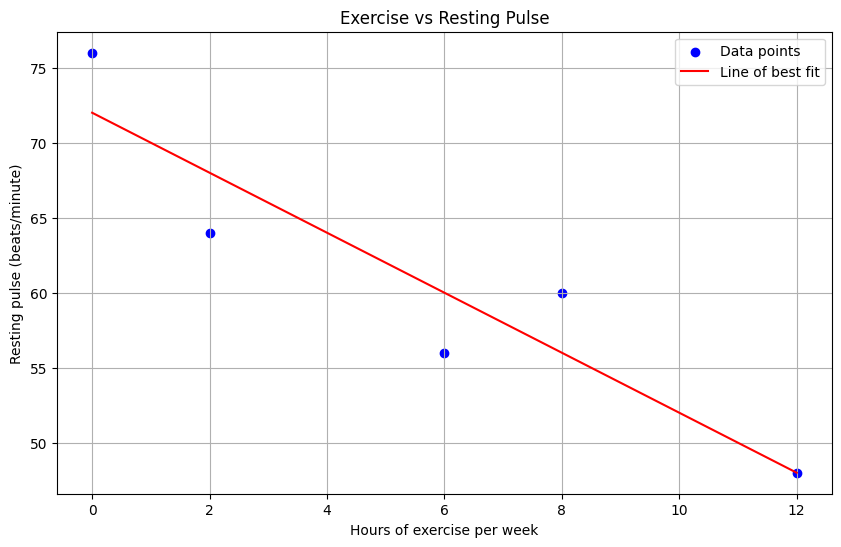

Equation of the line: y = -2.00x + 72.00


In [8]:
# Suppose we have these data points (x, y) where x is hours of exercise per week and y is resting pulse (beats/minute) for five people: (0,76), (2,64), (6,56), (8,60), (12,48). We want to find the line y = b0 + b1x that best fits these points. We'll be using a simple graph method like you would in Excel.

# Set up the x and y points:
x = np.array([0, 2, 6, 8, 12])
y = np.array([76, 64, 56, 60, 48])

# Calculate the coefficients of the line of best fit
coeffs = np.polyfit(x, y, 1)
b1, b0 = coeffs

# Create the line of best fit
line = b0 + b1 * x

# Graph our points and the line of best fit:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, line, color='red', label='Line of best fit')
plt.xlabel('Hours of exercise per week')
plt.ylabel('Resting pulse (beats/minute)')
plt.title('Exercise vs Resting Pulse')
plt.legend()
plt.grid(True)
plt.show()

# Print the equation of the line
print(f"Equation of the line: y = {b1:.2f}x + {b0:.2f}")

In [14]:
# Solve same problem using X as a 5x2 matrix, Y as a 5x1 matrix, and then b-> is a 2x1 matrix, with entries b0 and b1. Our goal is to solve X * b-> = Y. Our goal here is to show how regression works & what something like Excel uses to find the line of best fit.

# Set up the matrix X
X = np.array([
    [1, 0],
    [1, 2],
    [1, 6],
    [1, 8],
    [1, 12]
])

# Set up the matrix Y
Y = np.array([
    [76],
    [64],
    [56],
    [60],
    [48]
])

# Set up the matrix b->
b = np.array([
    [b0],
    [b1]
])

# Then take X transpose:
X_transpose = X.T

# Then compute X transpose * X:
X_transpose_X = X_transpose @ X

# Then compute the inverse of X transpose * X:
X_transpose_X_inverse = np.linalg.inv(X_transpose_X)

# Then compute b-> = Inverse of X transpose * X * X transpose * Y
b = X_transpose_X_inverse @ X_transpose @ Y

# Print the result
print(b)
# Print as the line of best fit:
print(f"Equation of the line: y = {b[1][0]:.2f}x + {b[0][0]:.2f}")

[[72.]
 [-2.]]
Equation of the line: y = -2.00x + 72.00
